In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score


df1 = pd.read_csv("saved_tweets_vaderscore.csv")

#Removing non-relevant variables
df1=df1.drop(columns=['VADER_score','Unnamed: 0'],axis=1)

df1.predicted_sentiment.replace(('positive', 'negative','neutral'), (1,2,3), inplace=True)

#defining target varibale
df_target=df1[['predicted_sentiment']].values
df_var=df1.drop(columns=['predicted_sentiment'],axis=1).values

df1.head() 
#splitting dataset into training and testing 





,full_text,predicted_sentiment
0,". and have signed on with , to make million do...",2
1,"The burden of ""evidence"" should be upon those ...",3
2,""" promised universal access Well be ready to p...",1
3,""" promised universal access Well be ready to p...",1
4,"According to initial estimation, healthcare wo...",2


In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_var, df_target, test_size = 0.3, random_state = 0)

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train.ravel())
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
X_train = vectoriser.transform(X_train.ravel())
X_test  = vectoriser.transform(X_test.ravel())
print(f'Data Transformed.')


Vectoriser fitted.
No. of feature_words:  7612
Data Transformed.


              precision    recall  f1-score   support

           1       0.33      0.10      0.15        10
           2       0.69      0.68      0.69        82
           3       0.64      0.70      0.67        86

    accuracy                           0.66       178
   macro avg       0.55      0.49      0.50       178
weighted avg       0.65      0.66      0.65       178

Your Model Accuracy is 0.6573033707865169


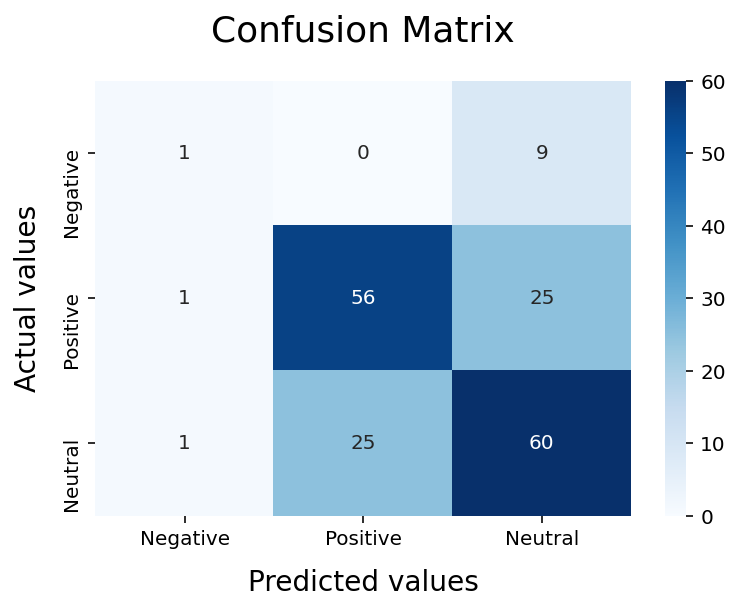

In [74]:

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive','Neutral']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    score=accuracy_score(y_test,y_pred) 
    print("Your Model Accuracy is", score)
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix,  cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories,annot=True)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
SVCmodel = svm.LinearSVC(random_state=20 ,C=80,tol=1e-5,max_iter=10000) 
SVCmodel.fit(X_train, y_train.ravel())
model_Evaluate(SVCmodel)  



              precision    recall  f1-score   support

           1       0.18      0.20      0.19        10
           2       0.60      0.82      0.69        82
           3       0.68      0.44      0.54        86

    accuracy                           0.60       178
   macro avg       0.49      0.49      0.47       178
weighted avg       0.62      0.60      0.59       178

Your Model Accuracy is 0.601123595505618


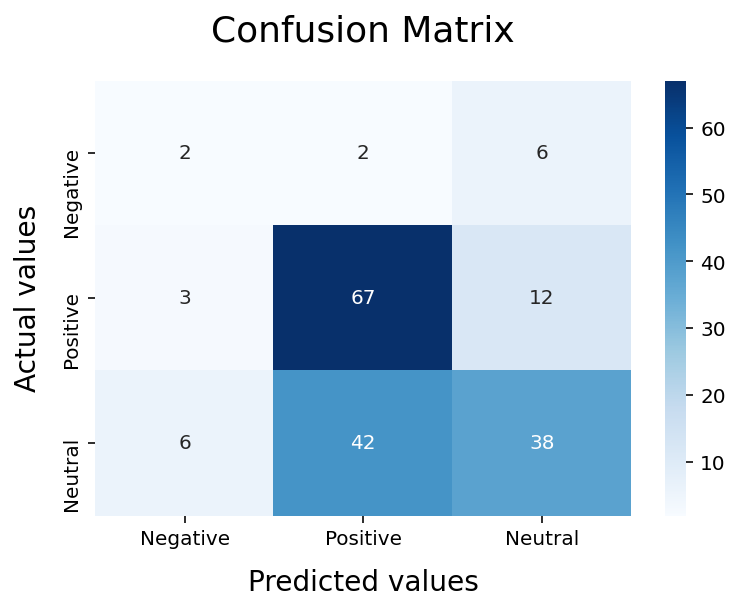

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 60, min_samples_leaf =1,min_samples_split=2)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
model_Evaluate(clf)  

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.67      0.84      0.75        82
           3       0.79      0.63      0.70        86

    accuracy                           0.69       178
   macro avg       0.49      0.49      0.48       178
weighted avg       0.69      0.69      0.68       178

Your Model Accuracy is 0.6910112359550562


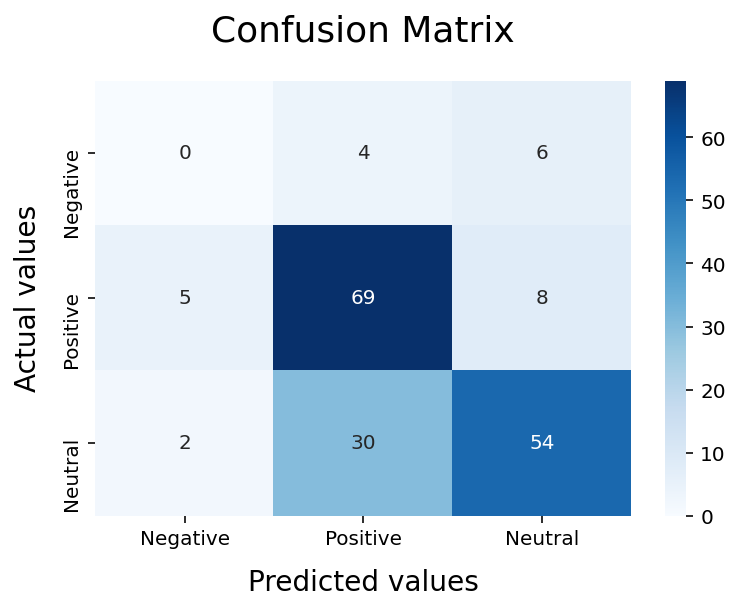

In [76]:
# DecisionTree classifier 
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=100, min_samples_leaf=1,min_samples_split=2) 
 
clf_gini.fit(X_train, y_train) 

model_Evaluate(clf_gini)  

In [77]:

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive','Neutral']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    score=accuracy_score(y_test,y_pred) 
    print("Your Model Accuracy is", score)
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix,  cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories,annot=True)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    


In [78]:
SVCmodel = svm.LinearSVC(random_state=20 ,C=80,tol=1e-5,max_iter=10000) 
SVCmodel.fit(X_train, y_train.ravel()) 
y_pred = SVCmodel.predict(X_test) 
score=accuracy_score(y_test,y_pred) 
print("SVM Model Accuracy is", score)



SVM Model Accuracy is 0.6573033707865169


In [79]:
# Train Decision Tree Classifer
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 60, min_samples_leaf =1,min_samples_split=2)
clf = clf.fit(X_train,y_train.ravel()) 
y_pred = clf.predict(X_test) 
score=accuracy_score(y_test,y_pred) 
print("Decision Tree Classifer Model Accuracy is", score)

Decision Tree Classifer Model Accuracy is 0.601123595505618
